# Introduction to Bayesian Deep Learning 

## Probabilistic Machine Learning

### 1. Machine Learning<br>
Machine Learning simply is to develop some algorithms that perform certain tasks given some data. It can range from finding a pattern in unstructured data to classifying emails, from language understanding to autonomous cars. Based on the observed data, some inference is made by a machine learning method. A model is trained which learns some patterns and assumptions from the observed data (training data) and makes inference on the unobserved data (test data). Since every inference comes with prediction confidence, a conclusion is derived. However, the model can be uncertain about the prediction due to numerous reasons: input data noise, sensory noise, measurement errors, non-optimal hyper-parameters settings and so on. <br>

### 2. Probabilistic Model in Machine Learning<br>
The probabilistic model in Machine Learning states that all forms of uncertainty cannot be a true value but more like a probability value and uses probability theory to answer everything. Probabilistic distributions are used to model the learning, the uncertainty, and the unobserved states. A prior probability distribution is defined before observing the data, the learning happens and the distribution transforms into posterior distributions once the data is observed. Using probability theory to learn from data forms the base for Bayesian Learning.

## Neural Networks

### 1. Brain Analogies

A perceptron is conceived as a mathematical model of how the neurons function in our brain by a famous psychologist Rosenblatt. According to Rosenblatt, a neuron takes a set of binary inputs (nearby neurons), multiplies each input by a continuous-valued weight (the synapse strength to each nearby neuron), and thresholds the sum of these weighted inputs to output a 1 if the sum is big enough and otherwise a 0 (the same way neurons either fire or do not fire).

<img src="https://miro.medium.com/max/1894/1*9oIF4_k2zL5FH92dkRot0Q.png" width="50%" align="center"> <br>
[source: http://cs231n.github.io/neural-networks-1/]

### 2. Artificial Neural Network

Inspired by the biological nervous system, the structure of an Artificial Neural Network (ANN) was developed to process information similar to how brain process information. A large number of highly interconnected processing elements (neurons) working together makes a Neural Network solve complex problems. Just like humans learn by example, so does a Neural Network. Learning in biological systems involves adjustments to the synaptic connections which is similar to weight updates in a Neural Network.<br>

A Neural Network consists of three layers: input layer to feed the data to the model to learn representation, hidden layer that learns the representation and the output layer that outputs the results or predictions. Neural Networks can be thought of an end to end system that finds patterns in data which are too complex to be recognized by a human to teach to a machine.

<img src="https://miro.medium.com/max/1522/1*ozBVCzy6acVfLuSESiyeBw.png" width="50%" align="center"> <br>

## Bayesian Deep learning

### 1. Modelling complex systems

According to Cohen & Stewart, mathematical descriptions of anything more or less complex are merely models and not fundamental truths. Mathematically, we build our model based on observed data by doing inference.<br>

In Bayesian inference, we see the model parameters θ as random variables, i.e. we want to learn them, whereas we see in frequentist inference the model parameters θ as fixed, but unknown descriptions of the truth. In frequentist inference, our conducted experiments are seen as samples from an infinitely large set of the exact same experiment (e.g., rolling a fair dice, i.e. the true model parameters θ determining the outcome of each roll are 1/6 for each side of the dice).<br>

<img src="https://miro.medium.com/max/1200/0*BwLwi0fgMY6m7b0V.png" width="50%" align="center"> <br>

In frequentist inference, we see model parameters θ as unchangeable, hence this school of thought argues that an ideal model, i.e. conducting our experiments infinitely often, represent the true state of anything more or less complex. So, we can directly deduce that Bayesian inference is in any complex instance more appropriate to use than frequentist inference.<br>



### 2. Bayesian Neural Network (BNN)

A Bayesian neural network (BNN) refers to extending standard networks with posterior inference. Standard NN training via optimization is (from a probabilistic perspective) equivalent to maximum likelihood estimation (MLE) for the weights.

For many reasons this is unsatisfactory. One reason is that it lacks proper theoretical justification from a probabilistic perspective: why maximum likelihood? Why just point estimates? Using MLE ignores any uncertainty that we may have in the proper weight values. From a practical standpoint, this type of training is often susceptible to overfitting, as NNs often do.

One partial fix for this is to introduce regularization. From a Bayesian perspective, this is equivalent to inducing priors on the weights (say Gaussian distributions if we are using L2 regularization). Optimization in this case is akin to searching for MAP estimators rather than MLE. Again from a probabilistic perspective, this is not the right thing to do, though it certainly works well in practice.

The correct (i.e., theoretically justifiable) thing to do is posterior inference, though this is very challenging both from a modelling and computational point of view. BNNs are neural networks that take this approach. In the past this was all but impossible, and we had to resort to poor approximations such as Laplace’s method (low complexity) or MCMC (long convergence, difficult to diagnose). However, lately there have been some super-interesting results on using variational inference to do this, and this has sparked a great deal of interest in the area.

BNNs are important in specific settings, especially when we care about uncertainty very much. Some examples of these cases are decision making systems, (relatively) smaller data settings, Bayesian Optimization, model-based reinforcement learning and others.

### 3. Bayes by Backprop

Bayes by Backprop was introduced was Blundell, et al. (cite) for learning a probability distribution on the weights of a neural network. According to Bayes theorem, it allows us to predict an output y for a new data point x by integrating over all parameters θ:<br>

<img src="https://miro.medium.com/max/1384/1*7iOrI5jb6Dae630hCYENjA.png" width="25%" align="center"> <br>

as stated above, we try to find the probability of our model parameters θ given some data x. This is known as posterior and we want to compute it. Now the numerator has P(θ) which is our prior (estimation before seeing the data) and P(x|θ) which is the likelihood and shows the data distribution. Both of these values are easy to compute. The denominator P(x) is the evidence and it shows if the data x is generated from the model. Now, this makes things tricky. We can only compute this by integrating over all possible model values:<br>

<img src="https://miro.medium.com/max/1316/1*FzrX_7Qb7m1n6eXO2zrE9Q.png" width="21%" align="center"> <br>

As we can see, this makes the whole solution intractable and the only way to solve it is to approximate it. There are several methods that can be used to approximate the integrals and the popular ones such as Markov Chain Monte Carlo and variational inference.<br>

We have already known MCMC from previous courses, so here we mainly focus on variational inference.Assume we have any density function and we want to estimate it. We start with choosing a distribution (can be Gaussian as it is the most popular one) and we keep on changing it until we reach the very close to the desired function, our posterior in this case. We want to reach as close as possible to the true distribution which is intractable and we can do that by minimizing the Kullback-Liebler (KL) divergence between the two:

<img src="https://miro.medium.com/max/1506/1*b08FgIvbikjpX0ZTraY1sg.png" width="39%" align="center"> <br>

So, we have a function P(w|D) (our posterior from above) and we want to approximate it with another distribution q(w|D) with some variational parameters θ. But this is not the end. If we solve the KL divergence, it gives an intractable equation again due to the presence of an integral function:

<img src="https://miro.medium.com/max/2330/1*sZGFVuHKPZdhROYNWEy9YQ.png" width="50%" align="center"> <br>

Now we cannot approximate an approximated function already (Technically we can but it will again need to be as close as to the original function and hence KL divergence to find the distance and again the integration problem). So we can sample from the approximated function q(w|D) as it is much easier to sample weights from an approximated function q(w|D) than an intractable true posterior function p(w|D). Upon doing so we reach to a tractable function as stated below:

<img src="https://miro.medium.com/max/2058/1*88qCMa1S_2v-dWSbtwEG_A.png" width="50%" align="center"> <br>

These sampled weights w, are used in the backpropagation of the neural network to learn the posterior distribution. Now, as we can see it is possible to train the Bayesian Neural Network by Bayes by Backprop approach and Bayesian Neural Network incorporates regularization automatically.

## Bayesian NNs using TensorFlow Probability(TFP) example

In [0]:
#@title Import { display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
import tensorflow_probability as tfp

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, MaxPooling2D, Flatten, Dropout

np.random.seed(10)
tf.set_random_seed(10)

1. Import and preprocessing data

In [0]:
# Using MNIST data set for hand written digits recognition
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

img_zero = []
img_one = []
img_two = []
img_three = []
img_six = []

for i in range(len(x_train)):
  if y_train[i] == 0:
    img_zero.append(x_train[i])
  elif y_train[i] == 1:
    img_one.append(x_train[i])
  elif y_train[i] == 2:
    img_two.append(x_train[i])
  elif y_train[i] == 3:
    img_three.append(x_train[i])
  elif y_train[i] == 6:
    img_six.append(x_train[i])
  else:
    pass

img_zero = np.expand_dims(np.array(img_zero), axis=3)
img_one = np.expand_dims(np.array(img_one), axis=3)
img_two = np.expand_dims(np.array(img_two), axis=3)
img_three = np.expand_dims(np.array(img_three), axis=3)
img_six = np.expand_dims(np.array(img_six), axis=3)

label_zero = np.ones(len(img_zero), dtype=np.int32)*0
label_one = np.ones(len(img_one), dtype=np.int32)*1
label_two = np.ones(len(img_two), dtype=np.int32)*2
label_three = np.ones(len(img_three), dtype=np.int32)*3
label_six = np.ones(len(img_six), dtype=np.int32)*6

x_data = np.concatenate((img_zero, img_one, img_two), axis=0)
y_data = np.concatenate((label_zero, label_one, label_two), axis= 0)

print ('shape of x_data: ', x_data.shape)
print ('shape of y_data: ', y_data.shape)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, 
                                                 stratify=y_data,
                                                 random_state=10) 

    8192/11490434 [..............................] - ETA: 17s

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
shape of x_data:  (18623, 28, 28, 1)
shape of y_data:  (18623,)


2. Build the bayesian deep learning model

In [0]:
#sess.close()
tf.reset_default_graph()

inputs = Input(shape=(28, 28, 1))
x = tfp.layers.Convolution2DFlipout(32, (5, 5), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = tfp.layers.Convolution2DFlipout(64, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = tfp.layers.DenseFlipout(128, activation='relu')(x)
x = Dropout(0.25)(x)
outputs = tfp.layers.DenseFlipout(3, activation=None)(x)

model = Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_flipout (Conv2DFlipou (None, 28, 28, 32)        1632      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_flipout_1 (Conv2DFlip (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 128)               802944

3. Train the model

In [0]:
x = tf.placeholder(shape=[None, 28, 28, 1], dtype=tf.float32)
y = tf.placeholder(shape=[None], dtype=tf.int32)
n = tf.placeholder(shape=[], dtype=tf.float32) 

logits = model(x)
probs = tf.nn.softmax(logits, axis=1)
labels_distribution = tfp.distributions.Categorical(logits=logits)
log_probs = labels_distribution.log_prob(y)

neg_log_likelihood = -tf.reduce_mean(log_probs)
kl = sum(model.losses) / n
elbo_loss = neg_log_likelihood + kl

correct_preds = tf.equal(tf.cast(y, dtype=tf.int64), tf.argmax(probs, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

optimizer = tf.train.AdamOptimizer(0.001)
train_op = optimizer.minimize(elbo_loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 32
n_iter = 100
show_step = 50

history_loss_train = []
history_acc_train = []
history_loss_val = []
history_acc_val = []

for i in range(n_iter):
  batch_indices = np.random.choice(len(x_train), batch_size, replace=False)
  batch_x = x_train[batch_indices] 
  batch_y = y_train[batch_indices]

  feed_dict = {x: batch_x, y: batch_y, n: batch_size}
  sess.run(train_op, feed_dict=feed_dict )

  temp_loss, temp_acc = sess.run([elbo_loss, accuracy], 
                                        feed_dict=feed_dict)

  history_loss_train.append(temp_loss)
  history_acc_train.append(temp_acc)

  if (i+1) % show_step == 0:
    print ('-' * 70)
    print ('Iteration: ' + str(i+1) + '  Loss: ' + str(temp_loss) 
           + '  Accuracy: ' + str(temp_acc))

  batch_indices = np.random.choice(len(x_val), batch_size, replace=False)
  batch_x = x_val[batch_indices] 
  batch_y = y_val[batch_indices]

  feed_dict = {x: batch_x, y: batch_y, n: batch_size}
  sess.run(train_op, feed_dict=feed_dict )

  temp_loss, temp_acc = sess.run([elbo_loss, accuracy], 
                                        feed_dict=feed_dict)

  history_loss_val.append(temp_loss)
  history_acc_val.append(temp_acc)

----------------------------------------------------------------------
Iteration: 50  Loss: 34474.777  Accuracy: 0.9375
----------------------------------------------------------------------
Iteration: 100  Loss: 33087.727  Accuracy: 0.96875


4. Trace the training process

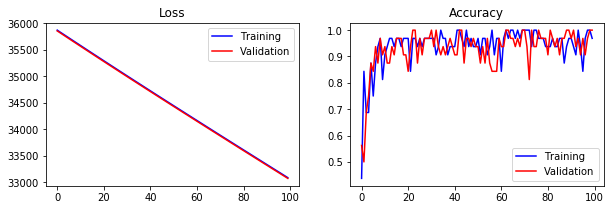

In [0]:
fig = plt.figure(figsize = (10, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(range(n_iter), history_loss_train, 'b-', label='Training')
ax1.plot(range(n_iter), history_loss_val, 'r-', label='Validation')
ax1.set_title('Loss')
ax1.legend(loc='best')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(range(n_iter), history_acc_train, 'b-', label='Training')
ax2.plot(range(n_iter), history_acc_val, 'r-', label='Validation')
ax2.set_title('Accuracy')
ax2.legend(loc='best')

plt.show()

5. Test the model using data set

In [0]:
idx = np.random.randint(1000)
n_samples = 100

#x_test = np.expand_dims(img_zero[idx], axis=0)
#y_true = 0

#x_test = np.expand_dims(img_two[idx], axis=0)
#y_true = 2

#x_test = np.expand_dims(img_three[idx], axis=0)
#y_true = 3

x_test = np.expand_dims(img_six[idx], axis=0)
y_true = 6

y_test_prob = []
feed_dict = {x: x_test, n: 1}
for i in range(n_samples):
  y_test_prob.append(sess.run(probs, feed_dict=feed_dict))

y_test_prob = np.squeeze(np.array(y_test_prob))

Input:  6



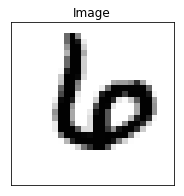

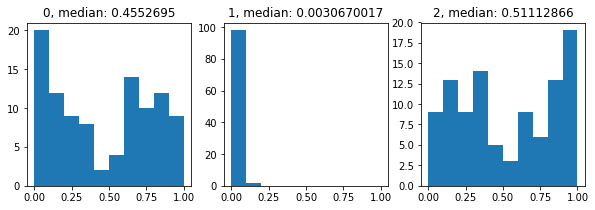

In [0]:
print ('Input: ', y_true)
print ()

plt.figure(figsize=(5, 3))
plt.imshow(np.squeeze(x_test), cmap='Greys')
plt.title('Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

fig = plt.figure(figsize = (10, 3))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(y_test_prob[:, 0], range=(0.0, 1.0))
ax1.set_title('0, median: ' + str(np.median(y_test_prob[:, 0])))

ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(y_test_prob[:, 1], range=(0.0, 1.0))
ax2.set_title('1, median: ' + str(np.median(y_test_prob[:, 1])))

ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(y_test_prob[:, 2], range=(0.0, 1.0))
ax3.set_title('2, median: ' + str(np.median(y_test_prob[:, 2])))

plt.show()

## References

[1] Bayesian Neural Network Series Post 2: Background Knowledge. <br> [Online] https://medium.com/neuralspace/bayesian-neural-network-series-post-2-background-knowledge-fdec6ac62d43<br>

[2] Probabilistic Deep Learning: Bayes by Backprop. <br> [Online] https://medium.com/neuralspace/probabilistic-deep-learning-bayes-by-backprop-c4a3de0d9743<br>

[3] Blundell, C., Cornebise, J., Kavukcuoglu, K., & Wierstra, D. (2015). Weight uncertainty in neural networks. arXiv preprint arXiv:1505.05424.

[4] Graves, A. (2011). Practical variational inference for neural networks. In Advances in neural information processing systems (pp. 2348–2356).

[5] Bayesian NNs using TensorFlow Probability - Making Your Neural Network Say “I Don’t Know”.<br> [Online] https://qiita.com/takeshikondo/items/6bae6124799c20e33eee<br>